In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar100_root = '../cifar100'

In [3]:
cifar100_train = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 64
train_data_loader = DataLoader(cifar100_train, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [6]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar100'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=100, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [7]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-2)

Epoch 1: 100%|██████████| 782/782 [00:11<00:00, 69.43it/s, loss=3.44]


epoch: 1 done, loss: 0.05811847001314163
Acc: 0.2385
[0.01]


Epoch 2: 100%|██████████| 782/782 [00:10<00:00, 72.10it/s, loss=2.62]


epoch: 2 done, loss: 0.04655832424759865
Acc: 0.3055
[0.01]


Epoch 3: 100%|██████████| 782/782 [00:10<00:00, 74.42it/s, loss=2.57]


epoch: 3 done, loss: 0.041816458106040955
Acc: 0.3455
[0.01]


Epoch 4: 100%|██████████| 782/782 [00:10<00:00, 75.71it/s, loss=2.22]


epoch: 4 done, loss: 0.038851503282785416
Acc: 0.3645
[0.01]


Epoch 5: 100%|██████████| 782/782 [00:10<00:00, 71.66it/s, loss=2.86]


epoch: 5 done, loss: 0.03679073229432106
Acc: 0.3836
[0.01]


Epoch 6: 100%|██████████| 782/782 [00:11<00:00, 70.08it/s, loss=2.29]


epoch: 6 done, loss: 0.03518781065940857
Acc: 0.3965
[0.01]


Epoch 7: 100%|██████████| 782/782 [00:10<00:00, 72.12it/s, loss=2.35]


epoch: 7 done, loss: 0.03393309563398361
Acc: 0.4052
[0.01]


Epoch 8: 100%|██████████| 782/782 [00:10<00:00, 73.38it/s, loss=1.99]


epoch: 8 done, loss: 0.032969314604997635
Acc: 0.4144
[0.01]


Epoch 9: 100%|██████████| 782/782 [00:10<00:00, 72.41it/s, loss=1.48]


epoch: 9 done, loss: 0.0321197472512722
Acc: 0.4184
[0.01]


Epoch 10: 100%|██████████| 782/782 [00:10<00:00, 73.50it/s, loss=1.92]


epoch: 10 done, loss: 0.03145017474889755
Acc: 0.4187
[0.01]


Epoch 11: 100%|██████████| 782/782 [00:10<00:00, 73.63it/s, loss=1.61]


epoch: 11 done, loss: 0.030797211453318596
Acc: 0.43
[0.01]


Epoch 12: 100%|██████████| 782/782 [00:10<00:00, 71.61it/s, loss=1.7] 


epoch: 12 done, loss: 0.030262086540460587
Acc: 0.4389
[0.01]


Epoch 13: 100%|██████████| 782/782 [00:10<00:00, 72.30it/s, loss=1.94]


epoch: 13 done, loss: 0.029657110571861267
Acc: 0.4347
[0.01]


Epoch 14: 100%|██████████| 782/782 [00:10<00:00, 72.04it/s, loss=1.16]


epoch: 14 done, loss: 0.02925596386194229
Acc: 0.4426
[0.01]


Epoch 15: 100%|██████████| 782/782 [00:11<00:00, 69.11it/s, loss=1.59]


epoch: 15 done, loss: 0.028914188966155052
Acc: 0.4334
[0.01]


Epoch 16: 100%|██████████| 782/782 [00:11<00:00, 69.33it/s, loss=1.67]


epoch: 16 done, loss: 0.028520721942186356
Acc: 0.4348
[0.001]


Epoch 17: 100%|██████████| 782/782 [00:12<00:00, 64.63it/s, loss=2.08]


epoch: 17 done, loss: 0.02575291134417057
Acc: 0.4622
[0.001]


Epoch 18: 100%|██████████| 782/782 [00:12<00:00, 63.42it/s, loss=1.96]


epoch: 18 done, loss: 0.025302337482571602
Acc: 0.467
[0.001]


Epoch 19: 100%|██████████| 782/782 [00:12<00:00, 62.44it/s, loss=1.88]


epoch: 19 done, loss: 0.025070492178201675
Acc: 0.4662
[0.001]


Epoch 20: 100%|██████████| 782/782 [00:12<00:00, 60.33it/s, loss=1.84]


epoch: 20 done, loss: 0.02497173473238945
Acc: 0.4655
[0.001]


Epoch 21: 100%|██████████| 782/782 [00:12<00:00, 64.16it/s, loss=1.76] 


epoch: 21 done, loss: 0.024894872680306435
Acc: 0.4643
[0.001]


Epoch 22: 100%|██████████| 782/782 [00:12<00:00, 63.07it/s, loss=1.36] 


epoch: 22 done, loss: 0.02476939931511879
Acc: 0.4686
[0.001]


Epoch 23: 100%|██████████| 782/782 [00:12<00:00, 62.35it/s, loss=1.9]  


epoch: 23 done, loss: 0.024686340242624283
Acc: 0.4647
[0.001]


Epoch 24: 100%|██████████| 782/782 [00:12<00:00, 62.01it/s, loss=2.43] 


epoch: 24 done, loss: 0.024607084691524506
Acc: 0.4687
[0.001]


Epoch 25: 100%|██████████| 782/782 [00:12<00:00, 62.80it/s, loss=1.66] 


epoch: 25 done, loss: 0.024472123011946678
Acc: 0.4687
[0.001]


Epoch 26: 100%|██████████| 782/782 [00:12<00:00, 60.63it/s, loss=1.13] 


epoch: 26 done, loss: 0.024441633373498917
Acc: 0.4686
[0.0001]


Epoch 27: 100%|██████████| 782/782 [00:11<00:00, 65.86it/s, loss=1.19] 


epoch: 27 done, loss: 0.024072056636214256
Acc: 0.471
[0.0001]


Epoch 28: 100%|██████████| 782/782 [00:11<00:00, 66.23it/s, loss=1.46] 


epoch: 28 done, loss: 0.024030761793255806
Acc: 0.4723
[0.0001]


Epoch 29: 100%|██████████| 782/782 [00:11<00:00, 66.49it/s, loss=1.96] 


epoch: 29 done, loss: 0.024043720215559006
Acc: 0.4729
[0.0001]


Epoch 30: 100%|██████████| 782/782 [00:12<00:00, 63.82it/s, loss=1.75] 


epoch: 30 done, loss: 0.02402476780116558
Acc: 0.4718
[0.0001]


Epoch 31: 100%|██████████| 782/782 [00:11<00:00, 65.69it/s, loss=2.05] 


epoch: 31 done, loss: 0.024006007239222527
Acc: 0.4728
[0.0001]


Epoch 32: 100%|██████████| 782/782 [00:10<00:00, 74.10it/s, loss=1.49]


epoch: 32 done, loss: 0.024037566035985947
Acc: 0.4734
[0.0001]


Epoch 33: 100%|██████████| 782/782 [00:10<00:00, 75.68it/s, loss=1.17] 


epoch: 33 done, loss: 0.02390317991375923
Acc: 0.4726
[0.0001]


Epoch 34: 100%|██████████| 782/782 [00:10<00:00, 76.17it/s, loss=2.1]  


epoch: 34 done, loss: 0.023994384333491325
Acc: 0.4729
[0.0001]


Epoch 35: 100%|██████████| 782/782 [00:10<00:00, 75.09it/s, loss=1.37] 


epoch: 35 done, loss: 0.023957213386893272
Acc: 0.4728
[1e-05]


Epoch 36: 100%|██████████| 782/782 [00:10<00:00, 75.08it/s, loss=1.94] 


epoch: 36 done, loss: 0.023962246254086494
Acc: 0.4728
[1e-05]


Epoch 37: 100%|██████████| 782/782 [00:10<00:00, 74.98it/s, loss=1.87] 


epoch: 37 done, loss: 0.023882301524281502
Acc: 0.4726
[1e-05]


Epoch 38: 100%|██████████| 782/782 [00:10<00:00, 73.40it/s, loss=0.951]


epoch: 38 done, loss: 0.023929167538881302
Acc: 0.4728
[1e-05]


Epoch 39: 100%|██████████| 782/782 [00:10<00:00, 73.04it/s, loss=1.46] 


epoch: 39 done, loss: 0.023926908150315285
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 782/782 [00:10<00:00, 76.79it/s, loss=1.86] 


epoch: 40 done, loss: 0.0238746777176857
Acc: 0.4733
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 782/782 [00:10<00:00, 76.59it/s, loss=1.37] 


epoch: 41 done, loss: 0.02384944073855877
Acc: 0.473
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 782/782 [00:10<00:00, 77.22it/s, loss=1.41] 


epoch: 42 done, loss: 0.023953048512339592
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 782/782 [00:10<00:00, 77.79it/s, loss=1.76] 


epoch: 43 done, loss: 0.02389289066195488
Acc: 0.473
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 782/782 [00:10<00:00, 75.54it/s, loss=1.23]


epoch: 44 done, loss: 0.023881161585450172
Acc: 0.473
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 782/782 [00:10<00:00, 76.22it/s, loss=1.01] 


epoch: 45 done, loss: 0.02391194924712181
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 782/782 [00:10<00:00, 76.14it/s, loss=2.11] 


epoch: 46 done, loss: 0.02389129251241684
Acc: 0.473
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 782/782 [00:10<00:00, 77.26it/s, loss=1.22] 


epoch: 47 done, loss: 0.023903997614979744
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 782/782 [00:10<00:00, 76.97it/s, loss=0.843]


epoch: 48 done, loss: 0.023946793749928474
Acc: 0.473
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 782/782 [00:11<00:00, 70.82it/s, loss=1]    


epoch: 49 done, loss: 0.023892797529697418
Acc: 0.473
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 782/782 [00:11<00:00, 66.84it/s, loss=0.975]


epoch: 50 done, loss: 0.023850636556744576
Acc: 0.473
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 782/782 [00:11<00:00, 65.91it/s, loss=1.85] 


epoch: 51 done, loss: 0.023929601535201073
Acc: 0.473
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 782/782 [00:11<00:00, 68.88it/s, loss=1.56] 


epoch: 52 done, loss: 0.023858612403273582
Acc: 0.473
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 782/782 [00:11<00:00, 69.90it/s, loss=1.26] 


epoch: 53 done, loss: 0.02394246682524681
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 782/782 [00:11<00:00, 69.72it/s, loss=1.33]


epoch: 54 done, loss: 0.02391498163342476
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 782/782 [00:11<00:00, 70.36it/s, loss=1.73] 


epoch: 55 done, loss: 0.023905109614133835
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 782/782 [00:11<00:00, 69.61it/s, loss=2.11] 


epoch: 56 done, loss: 0.023925775662064552
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 782/782 [00:11<00:00, 69.49it/s, loss=1.63]


epoch: 57 done, loss: 0.02386009506881237
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 782/782 [00:11<00:00, 69.81it/s, loss=2.64] 


epoch: 58 done, loss: 0.023881813511252403
Acc: 0.473
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 782/782 [00:10<00:00, 71.29it/s, loss=1.37] 


epoch: 59 done, loss: 0.023884113878011703
Acc: 0.4728
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 782/782 [00:11<00:00, 68.17it/s, loss=2.05] 


epoch: 60 done, loss: 0.02391006611287594
Acc: 0.473
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 782/782 [00:11<00:00, 68.39it/s, loss=1.29] 


epoch: 61 done, loss: 0.02385534904897213
Acc: 0.473
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 782/782 [00:11<00:00, 69.12it/s, loss=1.44] 


epoch: 62 done, loss: 0.02389761433005333
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 782/782 [00:11<00:00, 69.12it/s, loss=1.13] 


epoch: 63 done, loss: 0.023860035464167595
Acc: 0.473
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 782/782 [00:11<00:00, 69.32it/s, loss=1.42]


epoch: 64 done, loss: 0.023919321596622467
Acc: 0.473
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 782/782 [00:10<00:00, 71.38it/s, loss=1.87] 


epoch: 65 done, loss: 0.0239576306194067
Acc: 0.473
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 782/782 [00:11<00:00, 70.23it/s, loss=1.71] 


epoch: 66 done, loss: 0.02386428229510784
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 782/782 [00:10<00:00, 72.28it/s, loss=2.59] 


epoch: 67 done, loss: 0.02389865182340145
Acc: 0.473
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 782/782 [00:10<00:00, 74.88it/s, loss=0.72] 


epoch: 68 done, loss: 0.0238676555454731
Acc: 0.473
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 782/782 [00:10<00:00, 73.67it/s, loss=1.73] 


epoch: 69 done, loss: 0.023884059861302376
Acc: 0.473
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 782/782 [00:10<00:00, 73.99it/s, loss=1.55]


epoch: 70 done, loss: 0.023924637585878372
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 782/782 [00:10<00:00, 71.83it/s, loss=1.03] 


epoch: 71 done, loss: 0.023941688239574432
Acc: 0.473
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 782/782 [00:11<00:00, 70.60it/s, loss=1.14] 


epoch: 72 done, loss: 0.02388746105134487
Acc: 0.473
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 782/782 [00:12<00:00, 63.44it/s, loss=2.14]


epoch: 73 done, loss: 0.023913845419883728
Acc: 0.473
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 782/782 [00:11<00:00, 66.40it/s, loss=1.38] 


epoch: 74 done, loss: 0.02394518442451954
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 782/782 [00:12<00:00, 61.41it/s, loss=0.969]


epoch: 75 done, loss: 0.023899734020233154
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 782/782 [00:11<00:00, 66.95it/s, loss=1.73]


epoch: 76 done, loss: 0.02382466569542885
Acc: 0.473
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 782/782 [00:11<00:00, 68.97it/s, loss=2.58] 


epoch: 77 done, loss: 0.023938195779919624
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 782/782 [00:11<00:00, 65.58it/s, loss=1.05]


epoch: 78 done, loss: 0.023879889398813248
Acc: 0.473
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 782/782 [00:12<00:00, 61.52it/s, loss=0.95] 


epoch: 79 done, loss: 0.023826198652386665
Acc: 0.473
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 782/782 [00:11<00:00, 66.10it/s, loss=1.85] 


epoch: 80 done, loss: 0.023909583687782288
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 782/782 [00:11<00:00, 69.63it/s, loss=1.62] 


epoch: 81 done, loss: 0.0238655973225832
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 782/782 [00:11<00:00, 66.91it/s, loss=1.68] 


epoch: 82 done, loss: 0.023890236392617226
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 782/782 [00:11<00:00, 68.55it/s, loss=1.93] 


epoch: 83 done, loss: 0.023934677243232727
Acc: 0.473
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 782/782 [00:10<00:00, 74.47it/s, loss=1.42] 


epoch: 84 done, loss: 0.02387365885078907
Acc: 0.473
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 782/782 [00:10<00:00, 76.57it/s, loss=1.85] 


epoch: 85 done, loss: 0.02392679639160633
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 782/782 [00:11<00:00, 66.39it/s, loss=0.888]


epoch: 86 done, loss: 0.023937929421663284
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 782/782 [00:12<00:00, 63.43it/s, loss=1.91] 


epoch: 87 done, loss: 0.023879650980234146
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 782/782 [00:12<00:00, 60.95it/s, loss=1.93] 


epoch: 88 done, loss: 0.023901930078864098
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 782/782 [00:12<00:00, 60.69it/s, loss=1.94] 


epoch: 89 done, loss: 0.023872001096606255
Acc: 0.473
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 782/782 [00:13<00:00, 59.23it/s, loss=1.56]


epoch: 90 done, loss: 0.023840798065066338
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 782/782 [00:10<00:00, 75.07it/s, loss=1.69] 


epoch: 91 done, loss: 0.023933112621307373
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 782/782 [00:10<00:00, 73.44it/s, loss=1.33] 


epoch: 92 done, loss: 0.023954924196004868
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 782/782 [00:11<00:00, 67.69it/s, loss=1.26]


epoch: 93 done, loss: 0.023945562541484833
Acc: 0.4728
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 782/782 [00:10<00:00, 73.75it/s, loss=0.95] 


epoch: 94 done, loss: 0.023859750479459763
Acc: 0.4731
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 782/782 [00:10<00:00, 71.29it/s, loss=1.3]  


epoch: 95 done, loss: 0.0237955953925848
Acc: 0.473
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 782/782 [00:11<00:00, 68.42it/s, loss=0.861]


epoch: 96 done, loss: 0.023910965770483017
Acc: 0.4728
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 782/782 [00:10<00:00, 72.41it/s, loss=1.2]  


epoch: 97 done, loss: 0.023881886154413223
Acc: 0.4728
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 782/782 [00:10<00:00, 71.84it/s, loss=2.02] 


epoch: 98 done, loss: 0.023878412321209908
Acc: 0.4728
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 782/782 [00:10<00:00, 71.77it/s, loss=1.73] 


epoch: 99 done, loss: 0.02390032447874546
Acc: 0.4729
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 782/782 [00:10<00:00, 72.05it/s, loss=1.56] 


epoch: 100 done, loss: 0.023890815675258636
Acc: 0.473
[1.0000000000000002e-06]
Time taken: 1302.96974 seconds


In [8]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.4734, tensor(0.0325, device='cuda:0'))

<AxesSubplot: >

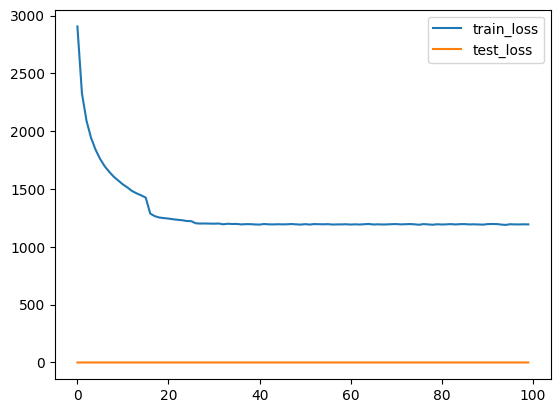

In [9]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])